In [20]:
import warnings
import itertools
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [21]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [22]:
server = 'DESKTOP-K2IRLC1' 
database = 'DW2023' 
username = 'sa' 
password = '123456'  

driver = 'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+ ';Trusted_Connection=yes'
# create the connection

query = '''SELECT DW.Dimension_Tiempo.FECHA AS FECHA, SUM([CANTIDAD_LLAMADAS]) AS [CANTIDAD]
  FROM DW.Hechos_Atencion INNER JOIN DW.Dimension_Tiempo
  ON DW.Hechos_Atencion.FECHAKEY = DW.Dimension_Tiempo.FECHAKEY
  INNER JOIN DW.Dimension_Clasificador ON DW.Dimension_Clasificador.COD_CLASIFICADORKEY = DW.Hechos_Atencion.COD_CLASIFICADORKEY

  WHERE DW.Dimension_Clasificador.CLASIFICADOR_ID IN (4)

  GROUP BY DW.Dimension_Tiempo.FECHA
  ORDER BY DW.Dimension_Tiempo.FECHA'''

conn = pyodbc.connect(driver)
data = pd.read_sql(query,conn)

data.head()


,FECHA,CANTIDAD
0,2018-01-01,110.0
1,2018-01-02,36.0
2,2018-01-03,20.0
3,2018-01-04,45.0
4,2018-01-05,54.0


In [23]:
data.tail() 

,FECHA,CANTIDAD
2186,2023-12-27,10.0
2187,2023-12-28,20.0
2188,2023-12-29,20.0
2189,2023-12-30,21.0
2190,2023-12-31,38.0


In [24]:
data['FECHA'].min()

Timestamp('2018-01-01 00:00:00')

In [25]:
data['FECHA'].max()

Timestamp('2023-12-31 00:00:00')

In [26]:
data = data.set_index('FECHA')
data.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='FECHA', length=2191, freq=None)

In [27]:
grafic = data['CANTIDAD'].resample('MS').mean()

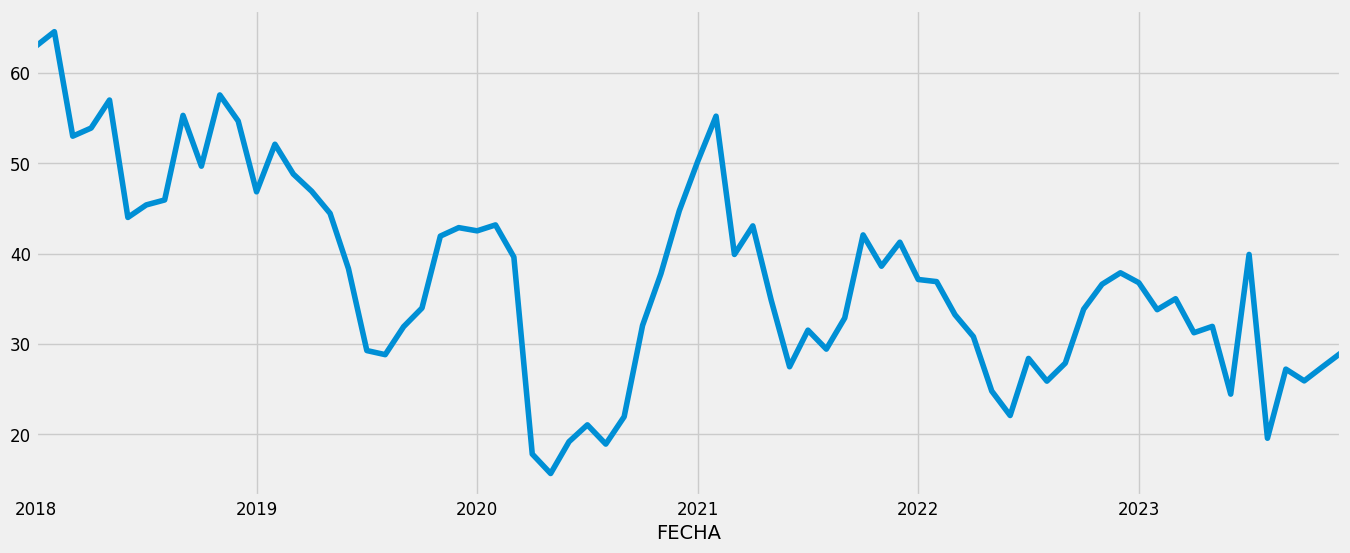

In [28]:
grafic.plot(figsize=(15, 6))
plt.show()

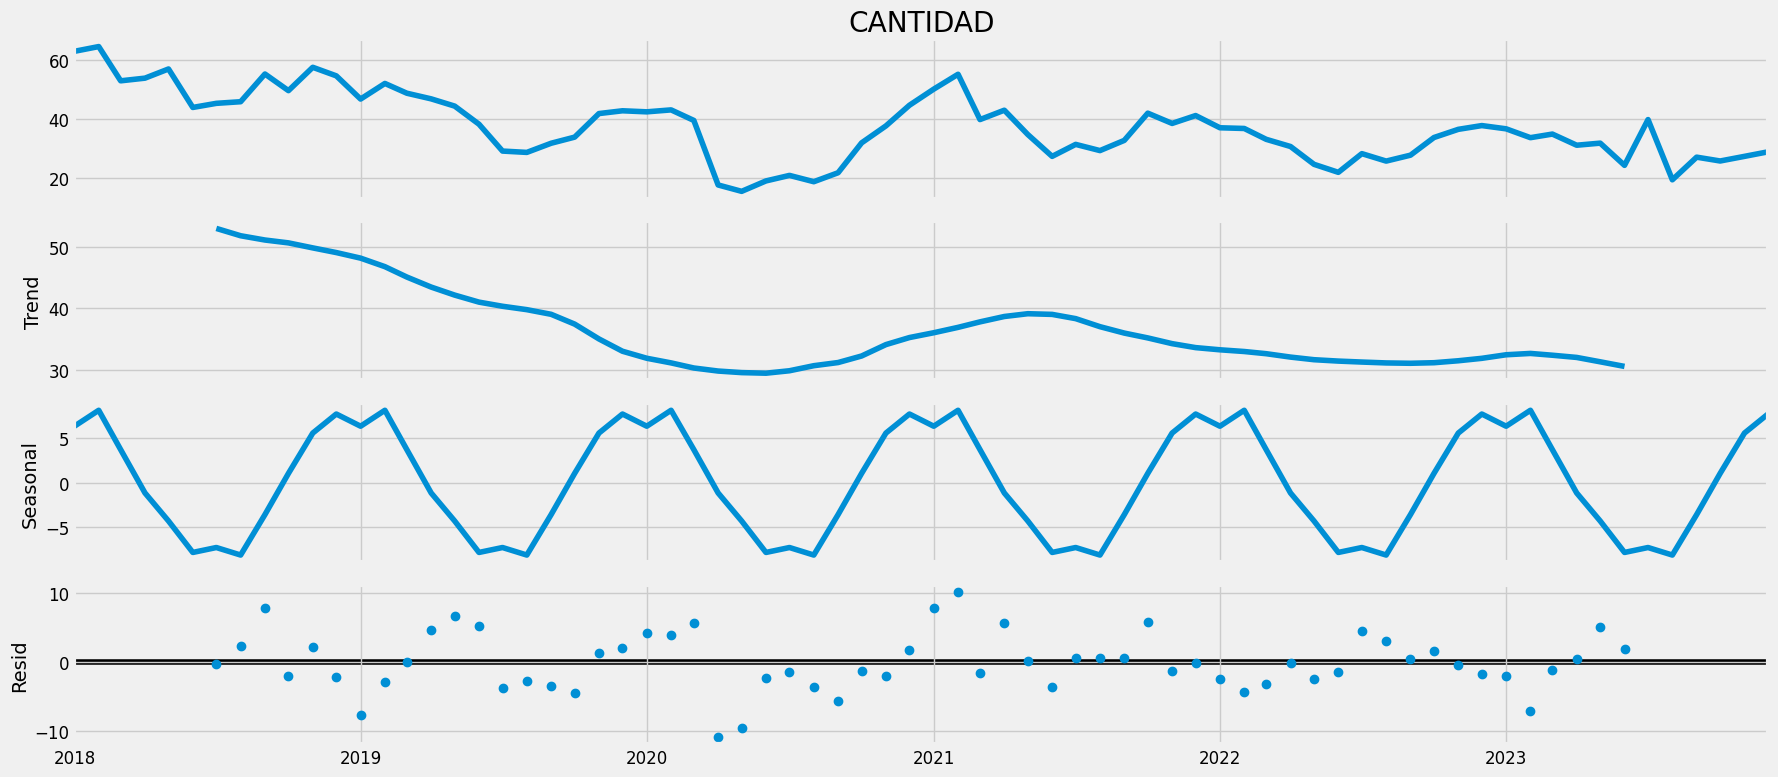

In [29]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(grafic, model='additive')
fig = decomposition.plot()
plt.show()

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(grafic,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:722.126425102316
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:556.6690148966227
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:457.7896149287439
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:359.5534218182856
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:445.44128861096806
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:423.4909224152483
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:367.0519274714816
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:362.55326748373477
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:634.2933869817125
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:491.3339689057931
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:423.0600012584635
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:332.7582048366902
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:421.9762488298412
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:399.52371677520205
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:347.6270128436321
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:325.1081584385438
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:464.95964323349966
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:382.866855436206
ARIMA(0,

In [32]:
mod = sm.tsa.statespace.SARIMAX(grafic,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3926      0.444     -0.884      0.377      -1.263       0.478
ma.L1          0.0749      0.464      0.161      0.872      -0.834       0.984
ar.S.L12      -0.0952      0.200     -0.476      0.634      -0.487       0.297
ma.S.L12      -0.5973      0.321     -1.860      0.063      -1.227       0.032
sigma2        39.8617     11.206      3.557      0.000      17.899      61.824


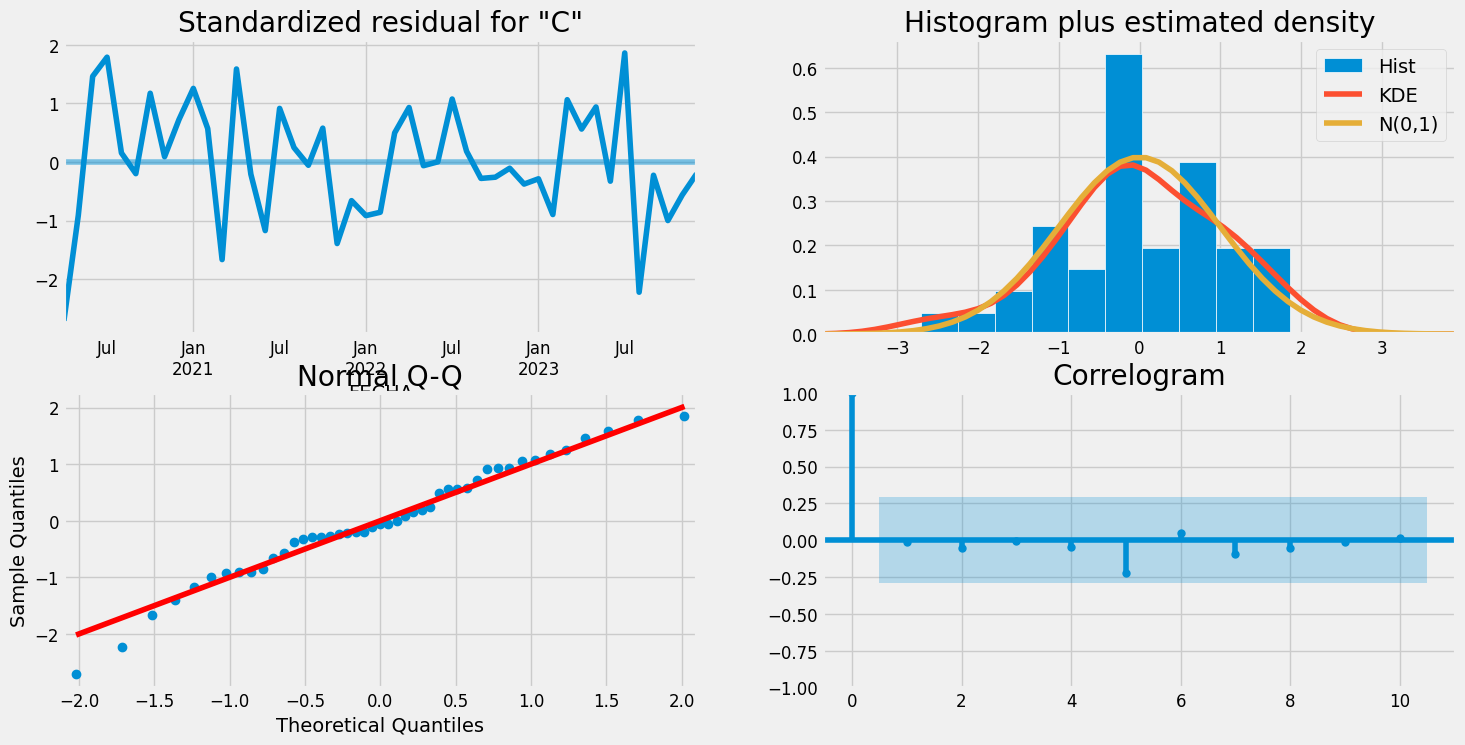

In [33]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

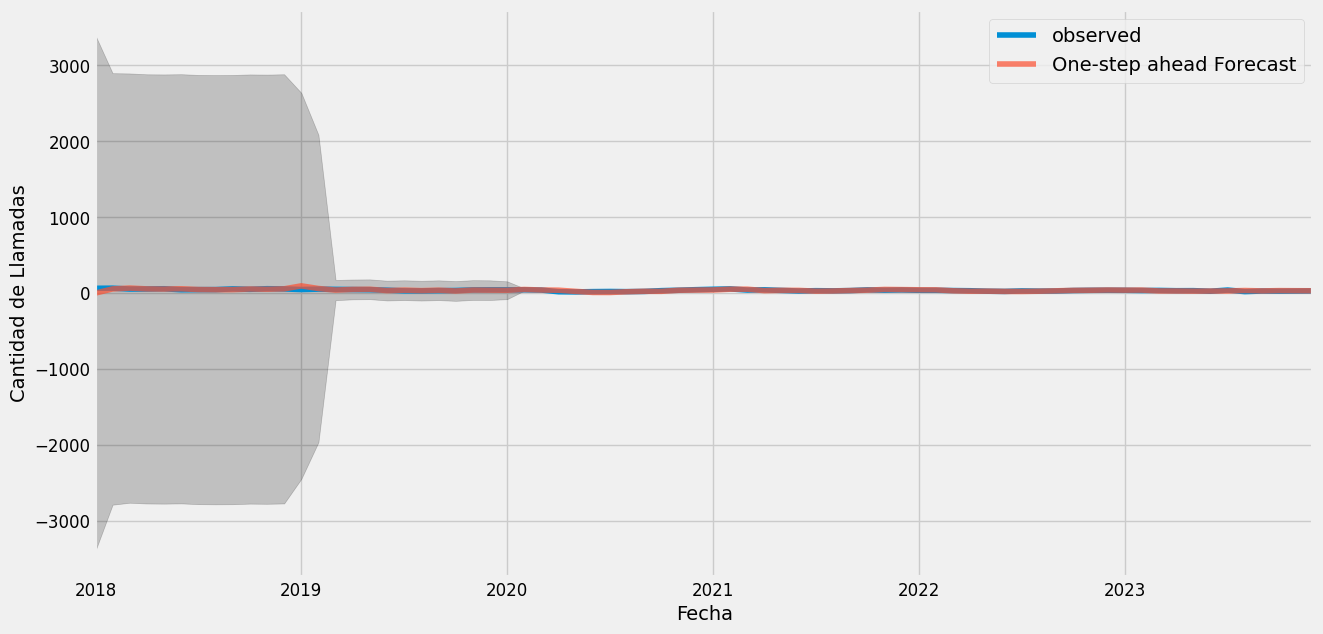

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = grafic['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')
plt.legend()

plt.show()

In [35]:
y_forecasted = pred.predicted_mean
y_truth = grafic['2021-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 34.72


In [36]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 5.89


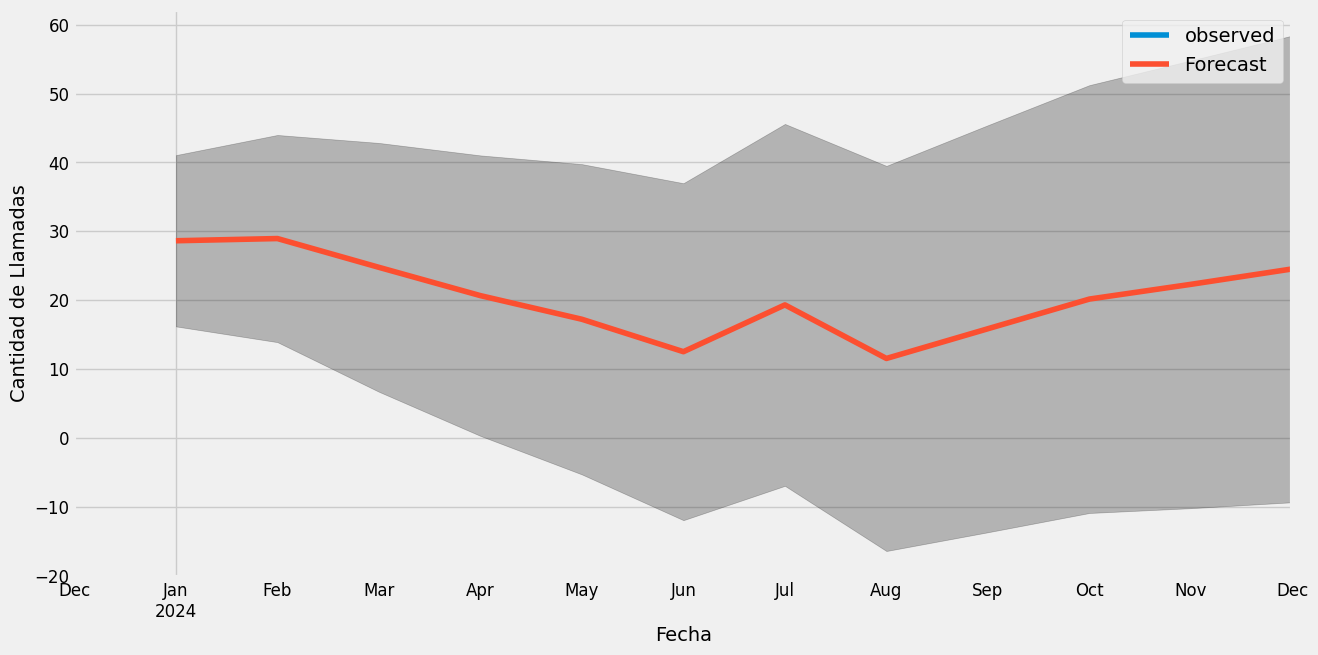

In [37]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = grafic['2023-12-01':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')

plt.legend()
plt.show()

pred_uc.summary_frame().to_csv("resultadosDVP.csv")
